In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing 
from functions import *   

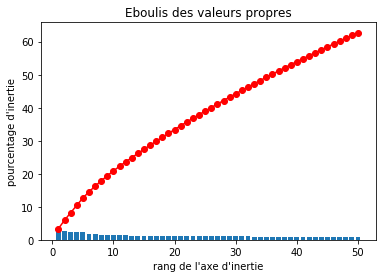

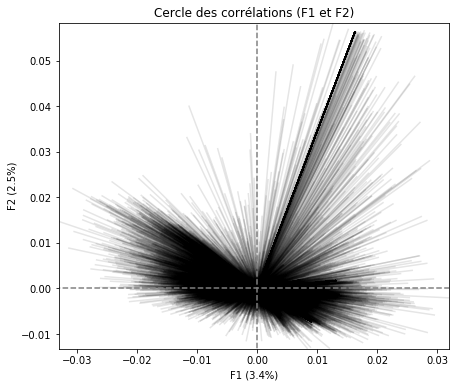

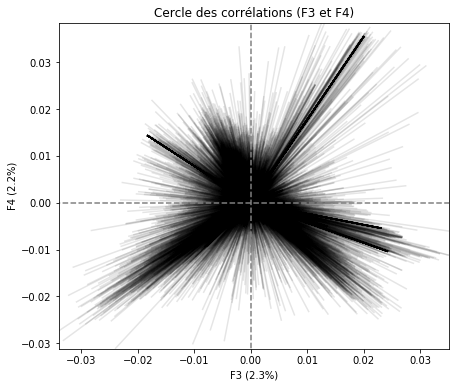

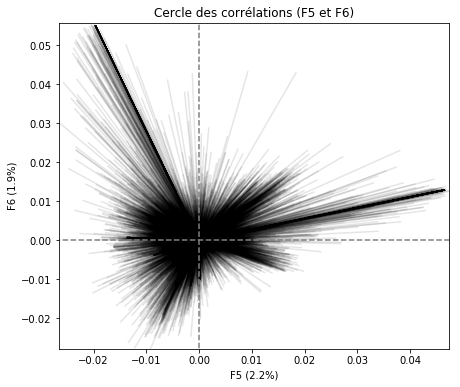

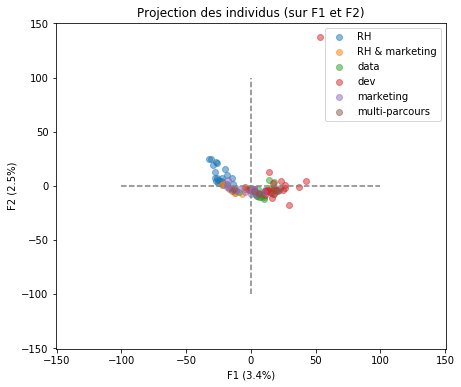

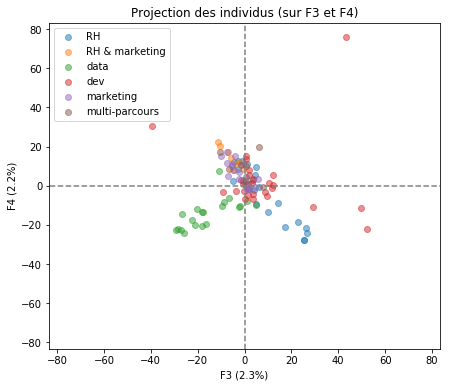

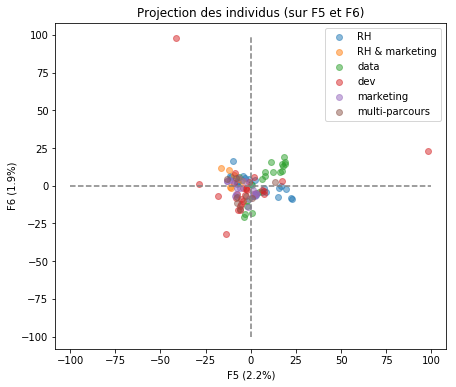

In [9]:
# choix du nombre de composantes à calculer
n_comp = 50

# import de l'échantillon et des informations relatives aux cours
data = pd.read_csv('bag_of_words.csv', index_col = 0)
courses_info = pd.read_csv('courses_info.csv',index_col = 0)

# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)
theme = [courses_info.loc[course_id, "theme"] for course_id in data.index]

# préparation des données pour l'ACP
X = data.values
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)])

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = theme, alpha = 0.5)

plt.show()


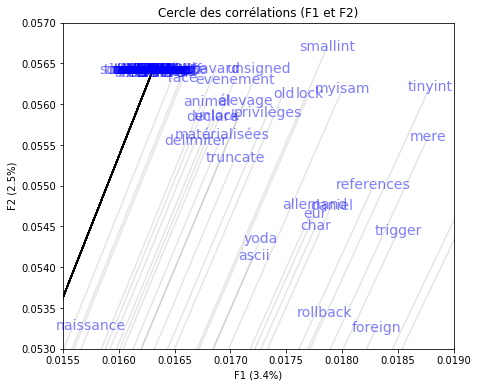

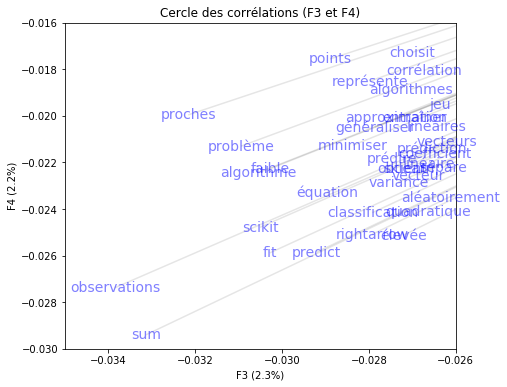

In [8]:
#Zoom sur les extrêmités du cercle de corrélation (on rajoute aussi le nom - labels) :
display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))